## <h1><center>Workshop Final: Título del trabajo</center></h1>

<a id="indice"></a> 
## Índice

### <a href='#section_objetivos'>0. Objetivos del Workshop Final</a>


### <a href='#section_introduccion'>1. Actualización y carga de bibliotecas</a>
- #### <a href='#1.1'>1.1 Carga de datos y armado del DataFrame</a>
- #### <a href='#1.2'>1.2 Análisis exploratorio de los datos</a>


### <a href='#2.'>2. Entrenamiento de los modelos de series de tiempo</a>
- #### <a href='#2.1'>2.1 </a>
- #### <a href='#2.2'>2.2 </a>
- #### <a href='#2.3'>2.3 </a>

### <a href='#3.'>3. Cálculo de errores para la evaluación de los modelos</a>
- #### <a href='#3.1'>3.1 </a>
- #### <a href='#3.2'>3.2 </a>

<a id="section_objetivos"></a> 
## 0. Objetivos del Workshop
<a href='#indice'>Volver a TOC</a>

Explicar qué vamos a hacer y por qué queremos hacerlo...

<a id="section_introduccion"></a> 
## 1. Actualización y carga de bibliotecas
<a href='#indice'>Volver a TOC</a>

En primera instancia, se cargarán todas las bibliotecas a utilizar. Algunas de ellas no se encuentran en el ambiente o requieren ser actualizadas, es por ello que dejamos las siguientes líneas comentadas para que se instalen las mismas

In [29]:
#!pip install --upgrade pandas --user

In [30]:
#!pip install --upgrade pandas-datareader --user

In [31]:
#!pip install --upgrade mplfinance --user

En caso que tire error cuando quiera conectarse a la API de yahoo finance (en la función _captura_datos_), recomendamos reiniciar jupyter lab una vez instaladas y actualizadas las librerías, o bien instalarlas directamente desde anaconda promt, mediante las siguientes sintaxis:
- pip install --upgrade pandas
- pip install --upgrade pandas-datareader
- pip install --upgrade mplfinance

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode

import warnings
warnings.filterwarnings('ignore')

import pandas_datareader.data as web
import datetime
from sklearn.model_selection import train_test_split

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima_model import ARIMA

import mplfinance as mpf

import statsmodels.api as sm

import plotly.subplots as ms
import plotly.graph_objects as go
import TimeSeriesAnalysis as ts

<a id="1.1"></a> 
## 1.1 Carga de datos y armado del DataFrame
<a href='#indice'>Volver a TOC</a>

Debido a que este trabajo apunta a poder analizar cualquier activo que el usuario quiera elegir y esté disponible en la API, se creó un archivo .py donde allí se alojan funciones creadas para falicitar esto último. La función _captura_datos_ permite elegir el tipo de activo,la fecha de inicio (año, mes día) y el intervalo (día, mes) para poder ser analizado.

In [33]:
data = ts.captura_datos("btc-usd","2015, 1, 1","m")

In [34]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,MA20,MA5,timeIndex
Date,,,,,,,,,
2015-01-01,320.434998,171.509995,320.434998,217.464005,1098811912,217.464005,NaN,NaN,0
2015-02-01,265.610992,212.014999,216.867004,254.263000,711518700,254.263000,NaN,NaN,1
2015-03-01,300.044006,236.514999,254.283005,244.223999,959098300,244.223999,NaN,NaN,2
2015-03-31,261.798004,214.873993,244.223007,236.145004,672338700,236.145004,NaN,NaN,3
2015-04-30,247.804001,228.572998,235.938995,230.190002,568122600,230.190002,NaN,236.457202,4


In [35]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close,MA20,MA5,timeIndex
count,83.000000,83.000000,83.000000,83.000000,8.300000e+01,83.000000,64.000000,79.000000,83.000000
mean,12436.185627,8702.248814,10110.602293,10797.537170,4.239533e+11,10797.537170,7811.304305,10004.084840,41.000000
std,17272.718909,12446.519871,14379.383682,15239.319037,5.580745e+11,15239.319037,7395.792869,13415.447692,24.103942
min,247.804001,171.509995,216.867004,217.464005,5.681226e+08,217.464005,369.728247,236.457202,0.000000
25%,738.319489,610.656494,648.558502,687.154480,3.070203e+09,687.154480,2705.556972,758.615686,20.500000
50%,7388.430176,5347.645996,6411.680176,6438.644531,1.583595e+11,6438.644531,6878.089001,6833.037988,41.000000
75%,12012.790527,8976.270508,10138.020996,10227.349609,6.766679e+11,10227.349609,7841.516281,9542.871777,61.500000
max,64863.097656,54519.765625,58926.562500,58918.832031,2.267153e+12,58918.832031,31744.665234,48828.082812,82.000000


<a id="1.2"></a> 
## 1.2 Análisis exploratorio de los datos
<a href='#indice'>Volver a TOC</a>

Luego, se creó la función _graficar_datos_ con el fin de poder visualizar las carácterística de la serie de tiempo (tendencia,estacionalidad,ciclos y aleatoriedad) con el fin de junto otras visualizaciones (histogramas, boxplots) poder tener un pequeño análisis estadístico descriptivo de tipo de activo elegido

<Figure size 432x288 with 0 Axes>

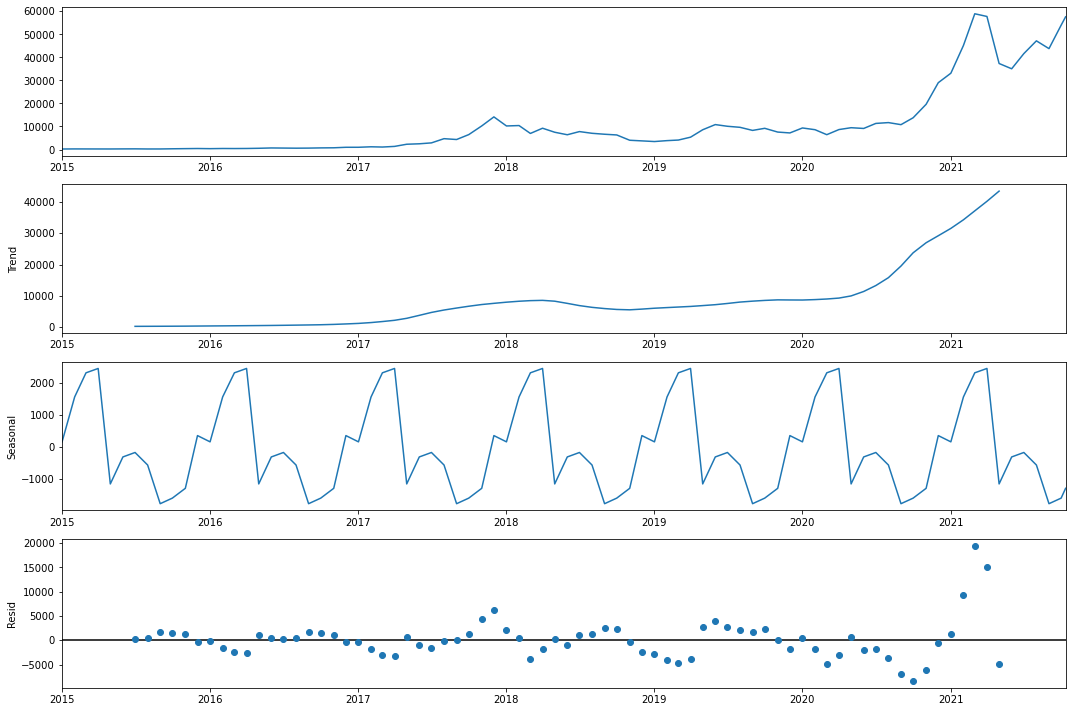

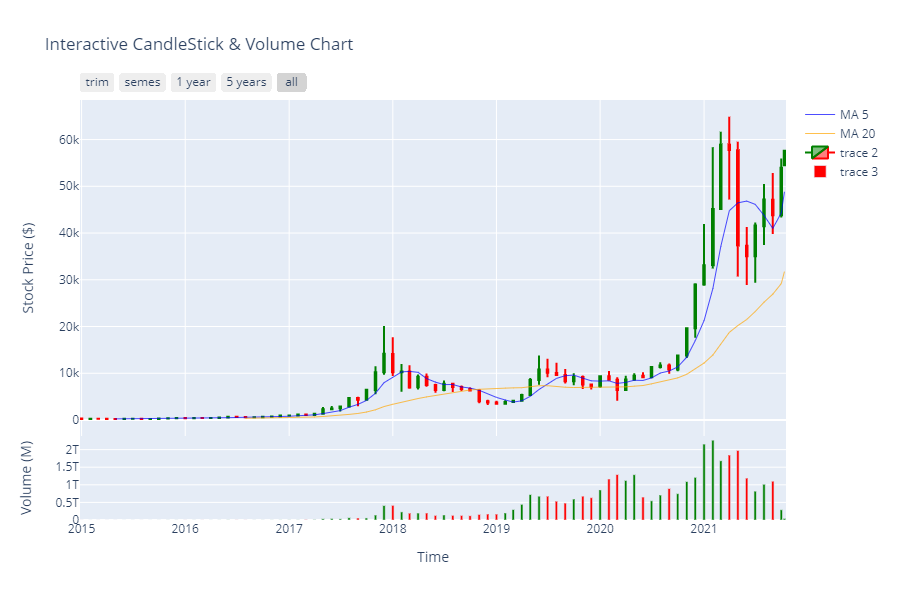

In [36]:
ts.graficar_datos(data)

## Acá yo agregaría histogramas, boxplots y alguna gilada más. Después podría estar bueno analizar si el activo que se eligió tiene valores faltantes y eso, y usar algunas funciones que tenía statmodels como para predecir esos valores y bla bla

<a id="2."></a> 
## 2. Entrenamiento de los modelos de series de tiempo
<a href='#indice'>Volver a TOC</a>

Ahora pasamos a seleccionar el modleo con el cual queremos predecir el activo elegido. Para eso, usamos la funcíón _evaluación_ cuyos parámetros son:
- df: DataFrame elegido
- pred_size: Tamaño del dataframe de test
- lags: cantidad de muestras para la ventana temporal del ACF y PACF
- model: Modelo a elegir, los cuales son:
    - linear
    - quad
    - log
- estacionalidad: Es un booleano (True o False) para elegir si se quiere modelar con estacionalidad o no.

elegimos el residuo del precio de cierre - exp(log est) - p= 0.016260663542859353
elegimos el residuo del precio de cierre - exp(log est) - p= 0.01630809248702762
elegimos el residuo del precio de cierre - exp(log est) - p= 4.938792509953534e-08
elegimos el residuo del precio de cierre - exp(log est) - p= 0.010134903035771498
elegimos el residuo del precio de cierre - exp(log est) - p= 0.021601395295160825
la serie no es estacionaria, hacer mas diferenciación


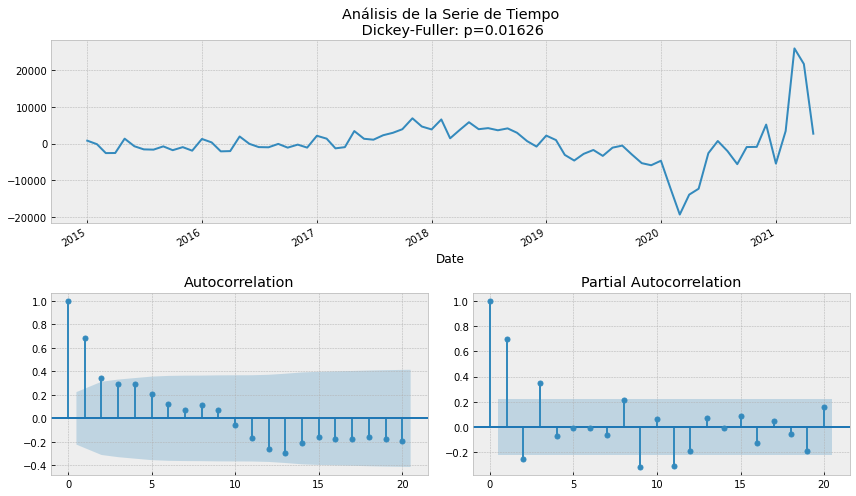

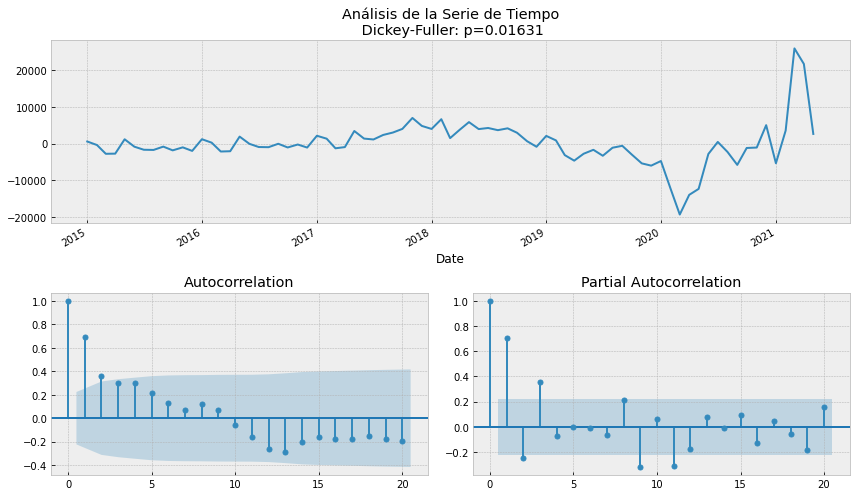

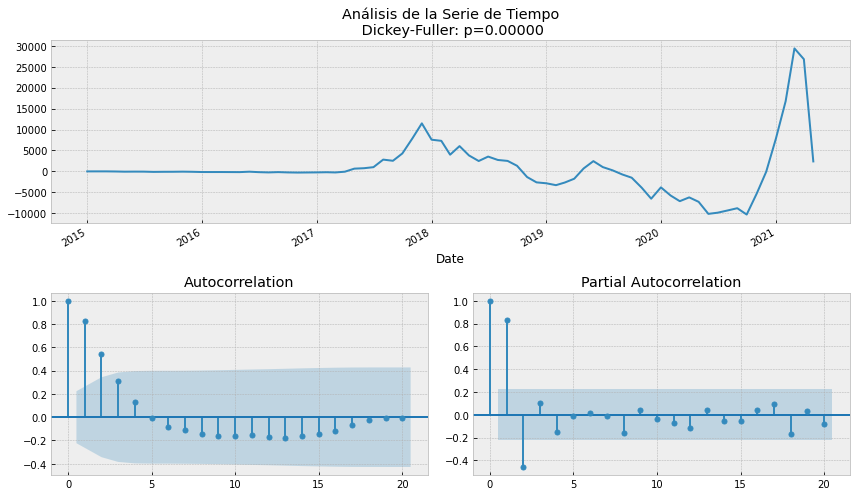

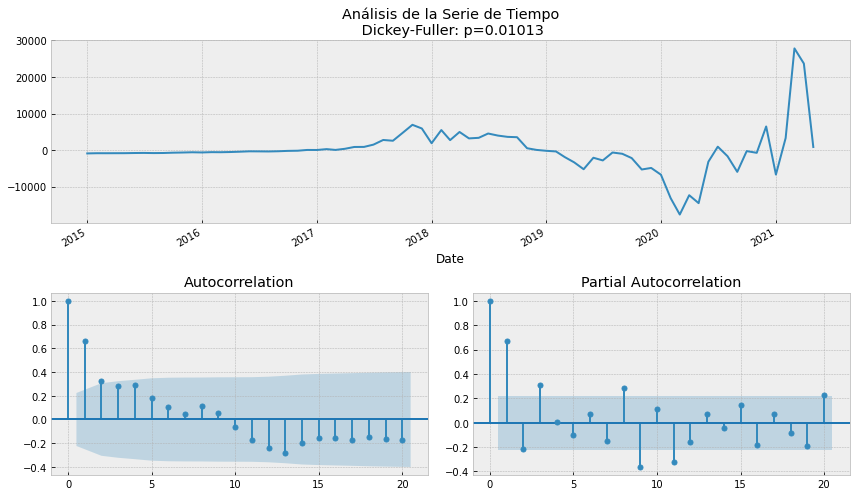

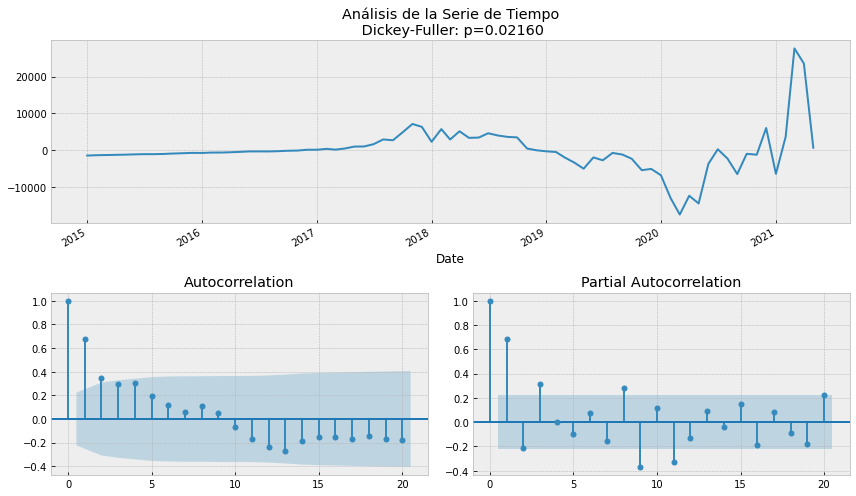

In [62]:
models = ['linear','quad','log']
est = [True, False]
model = {}
for j in est:
    for i in models:
        modelo = ts.evaluacion(data,6,20,model=i,estacionalidad=j)
        if j:
            model[str(i)+'_est']=modelo
        else:
            model[str(i)]=modelo

In [70]:
model['log']

Luego de esto, modelamos lo faltante mediante el modelo ARIMA

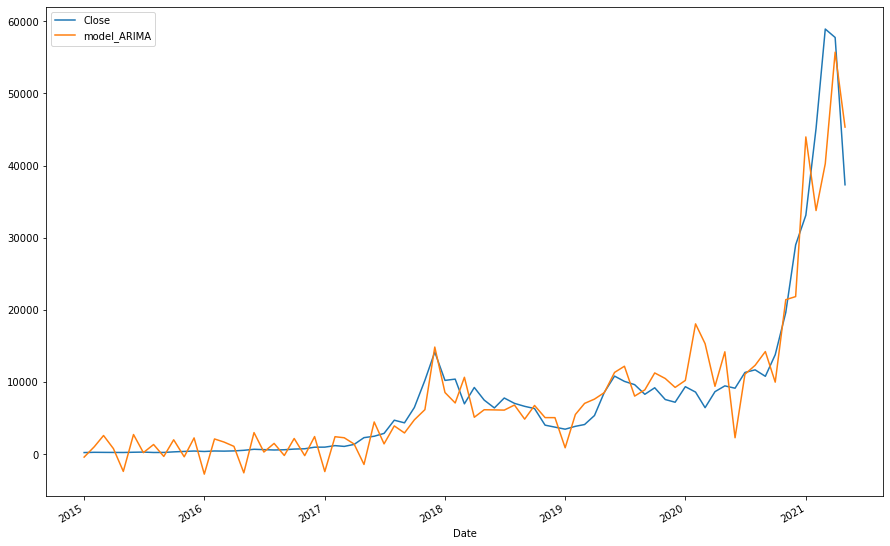

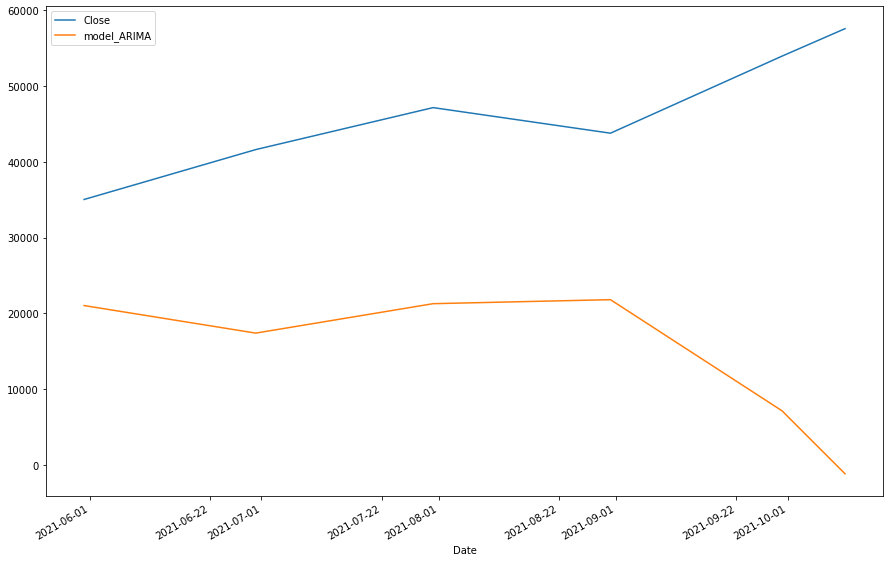

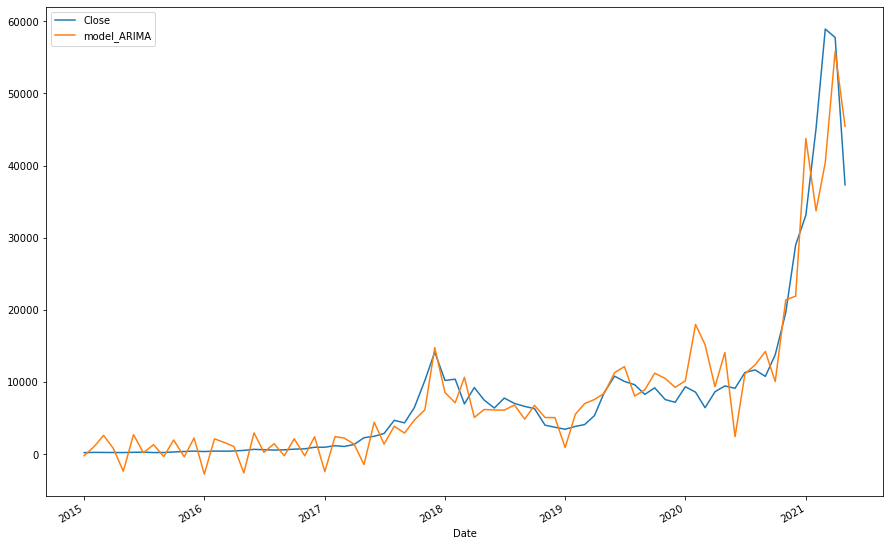

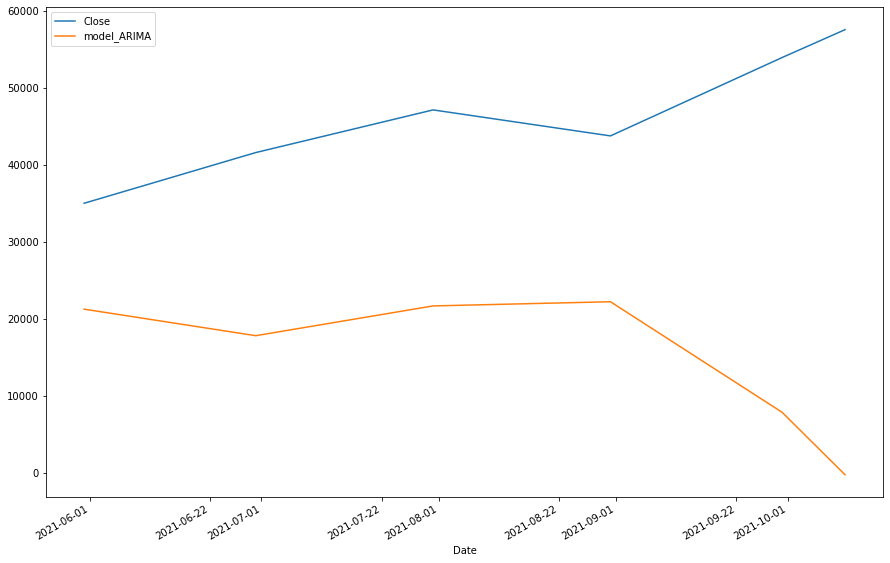

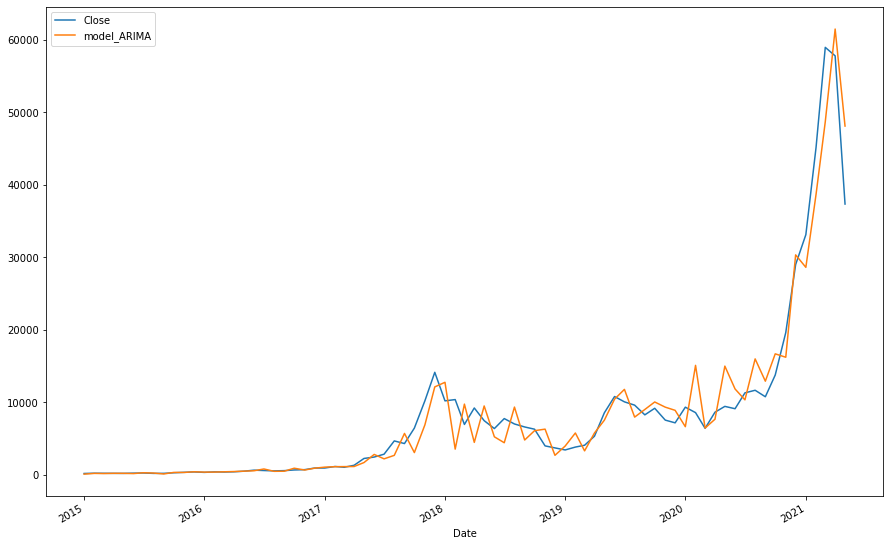

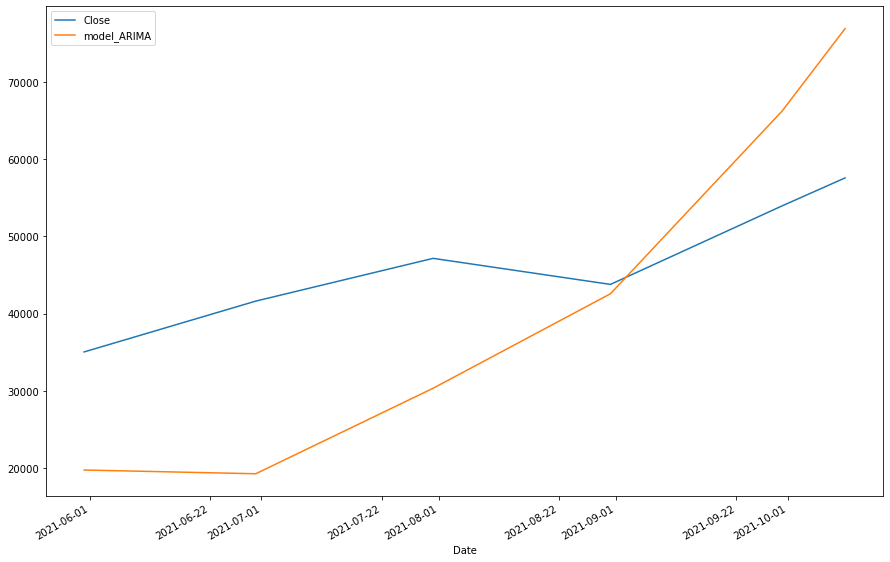

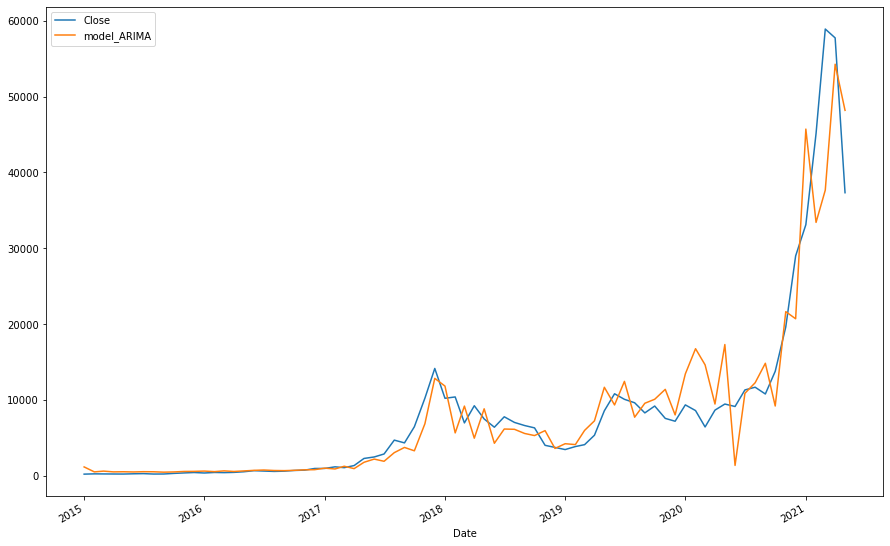

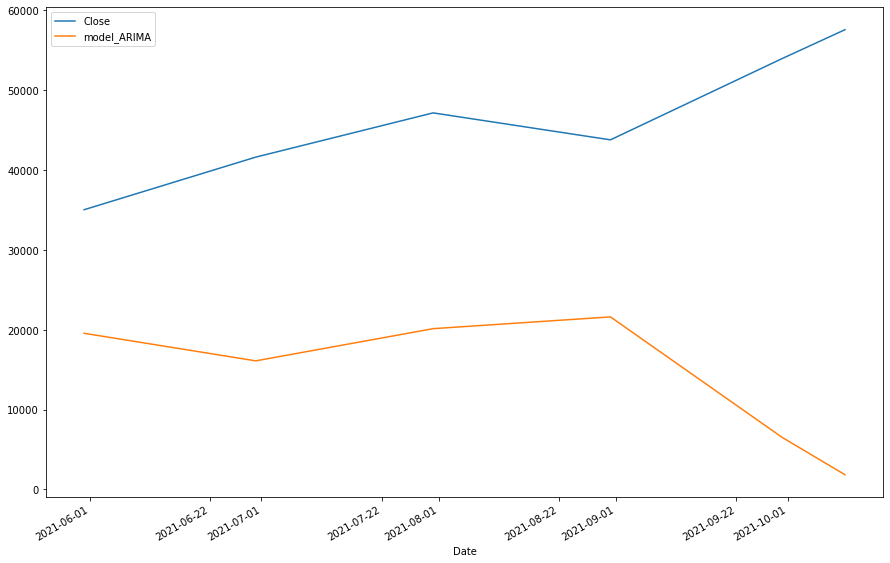

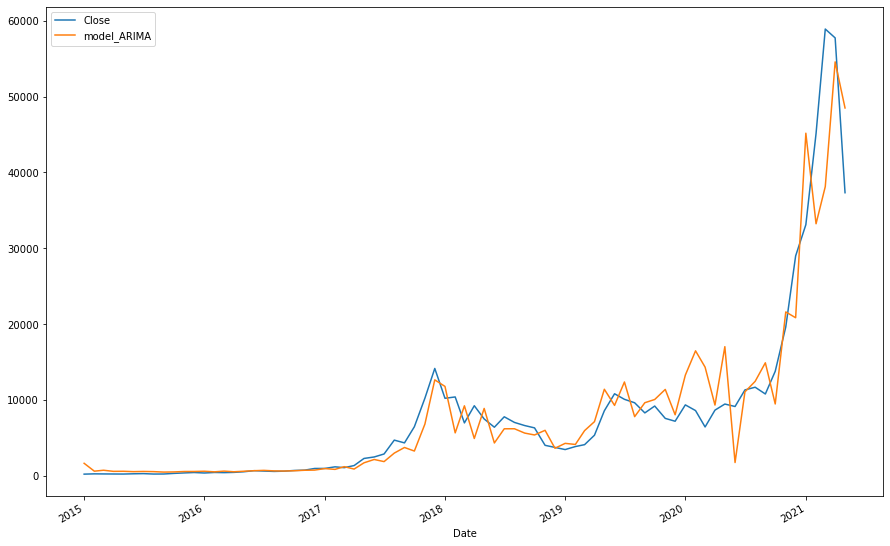

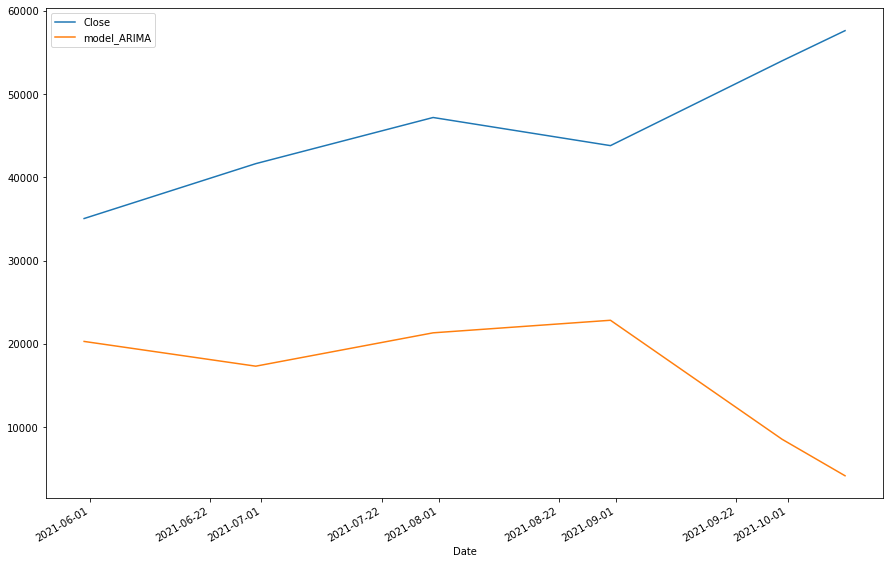

In [76]:
for j in est:
    if j:
        for i in models:
            try:
                ts.arima(model[str(i)+'_est'],2,0,2,0.05)
            except:
                continue
        else:
            for i in models:
                try:
                    ts.arima(model[str(i)],2,0,2,0.05)
                except:
                    continue

#ts.arima(modelo,2,0,2,0.05)

<a id="3."></a> 
## 3. Cálculo de errores para la evaluación de los modelos
<a href='#indice'>Volver a TOC</a>

In [119]:
dic = {}
dicc = {}
for j in est:
    if j:
        for i in models:
            try:
                df_train = model[str(i)+'_est'][1]
                df_test = model[str(i)+'_est'][2]
                dic['RMSE_train'] = ts.RMSE(df_train.model_ARIMA,df_train.Close)
                dic['RMSE_test'] = ts.RMSE(df_test.model_ARIMA,df_test.Close)
                dic['model'] = str(i) + '_est'
                lista = list(dic.values())
                dicc[str(i)+'_est'] = lista
            except:
                continue
        else:
            for i in models:
                try:
                    df_train = model[str(i)][1]
                    df_test = model[str(i)][2]
                    dic['RMSE_train'] = ts.RMSE(df_train.model_ARIMA,df_train.Close)
                    dic['RMSE_test'] = ts.RMSE(df_test.model_ARIMA,df_test.Close)
                    dic['model'] = str(i)
                    lista = list(dic.values())
                    dicc[str(i)] = lista
                except:
                    continue

df_eval = pd.DataFrame(dicc).T.rename(columns={0:'RMSE_train',1:'RMSE_test',2:'model'}).reset_index(drop=True)

In [120]:
df_eval

,RMSE_train,RMSE_test,model
0,3959.904256,35547.794204,linear_est
1,3930.062399,34959.503475,quad_est
2,2787.698732,16045.485649,log_est
3,4266.817127,35285.176479,linear
4,4192.201096,33748.293131,quad
